In [38]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import importlib

import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
import os
import pickle


from nixtla import NixtlaClient
from datetime import datetime

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [50]:
df_main = pd.read_excel("https://raw.githubusercontent.com/carrenogf/MCD-Series-Temporales/main/dataset/series_diarias.xlsx")
df_main = df_main.sort_values("FECHA",ascending=True)
df_main.set_index("FECHA", inplace=True)
df_copa = df_main["CHU_COPA_AJUST"].dropna()
df_recprop = df_main["CHU_REC_PROPIOS_AJUST"].dropna()
df_regal = df_main["CHU_REGALIAS_AJUST"].dropna()
dataframes = [df_copa, df_recprop, df_regal]
titulos = ["CHU_COPA_AJUST", "CHU_REC_PROPIOS_AJUST", "CHU_REGALIAS_AJUST"]

In [40]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc'
)

In [51]:
df = dataframes[0].copy()

In [55]:
df = dataframes[0].copy()
df = df.to_frame()
df.head()

,CHU_COPA_AJUST
FECHA,
2018-01-02,"1,211,928.17"
2018-01-03,"2,830,481.92"
2018-01-04,"387,205.10"
2018-01-05,"695,554.06"
2018-01-08,"862,726.10"


In [42]:
df['FECHITA'] = df.index
df.head()

,CHU_COPA_AJUST,FECHITA
FECHA,,
2018-01-02,"1,211,928.17",2018-01-02
2018-01-03,"2,830,481.92",2018-01-03
2018-01-04,"387,205.10",2018-01-04
2018-01-05,"695,554.06",2018-01-05
2018-01-08,"862,726.10",2018-01-08


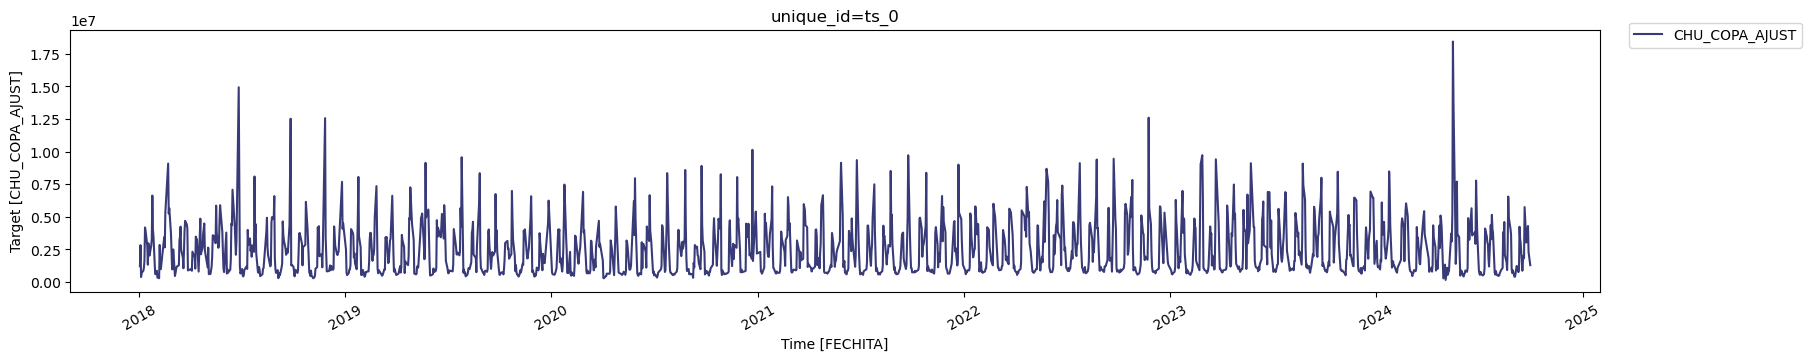

In [18]:
nixtla_client.plot(df,
                   time_col='FECHITA',
                   target_col='CHU_COPA_AJUST',
                   max_insample_length= 3000
                   )

In [43]:
# proyeccion
forecast_df = nixtla_client.forecast(
    df=df,
    h=30,
    target_col='CHU_COPA_AJUST',
    time_col='FECHITA',
    freq='B'
    #hist_exog_list=['total_pasos_ill', 'total_pasos_ave']
)

INFO:nixtla.nixtla_client:Validating inputs...


ValueError: Series contain missing or duplicate timestamps, or the timestamps do not match the provided frequency.
Please make sure that all series have a single observation from the first to the last timestamp and that the provided frequency matches the timestamps'.
You can refer to https://docs.nixtla.io/docs/tutorials-missing_values for an end to end example.

In [53]:
!pip install fugue


   ---------------------------------------- 0.0/278.2 kB ? eta -:--:--
   ----------------- ---------------------- 122.9/278.2 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 278.2/278.2 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
   ---------------------------------------- 62.3/62.3 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
    --------------------------------------- 0.5/25.1 MB 9.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.3/25.1 MB 16.4 MB/s eta 0:00:02
   ----- ---------------------------------- 3.2/25.1 MB 22.3 MB/s eta 0:00:01
   ------- -------------------------------- 4.9/25.1 MB 26.0 MB/s eta 0:00:01
   ---------- ----------------------------- 6.9/25.1 MB 29.2 MB/s eta 0:00:01
   ------------- -------------------------- 8.7/25.1 MB 30.8 MB/s eta 0:00:01
   --------------- ------------------------ 9.8/25.1 MB 31.3 MB/s eta 0:00:01
   ---

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


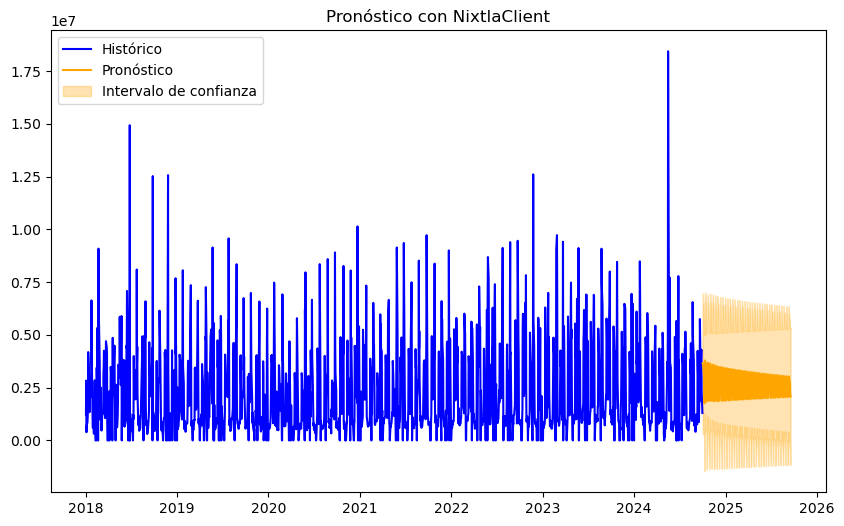

In [72]:
from nixtla import NixtlaClient
import pandas as pd
import matplotlib.pyplot as plt

# Configuración del cliente Nixtla
api_key = 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc'
nixtla_client = NixtlaClient(api_key=api_key)
df = df.asfreq("B")  # Asegura frecuencia diaria
df['CHU_COPA_AJUST'] = df['CHU_COPA_AJUST'].fillna(0)


# Configuración del forecast (se verifica método sin 'horizon')
response = nixtla_client.forecast(
    df=df,
    time_col=df.index.name,         # Nombre del índice de tiempo (columna de fecha)
    target_col="CHU_COPA_AJUST",    # Nombre de la columna objetivo
    freq="B",                       # Frecuencia de los datos (diaria)
    h=252,
    level=[80]  # Niveles de confianza para generar bounds
)

# Convertir la respuesta a DataFrame
forecast_df = pd.DataFrame(response)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CHU_COPA_AJUST'], label='Histórico', color='blue')
plt.plot(
    forecast_df["FECHITA"],
    forecast_df["TimeGPT"],
    label='Pronóstico',
    color='orange'
)
plt.fill_between(
    forecast_df["FECHITA"],
    forecast_df["TimeGPT-lo-80"],
    forecast_df["TimeGPT-hi-80"],
    color='orange',
    alpha=0.3,
    label='Intervalo de confianza'
)
plt.title("Pronóstico con NixtlaClient")
plt.legend()
plt.show()


In [70]:
forecast_df.head()

,FECHITA,TimeGPT,TimeGPT-hi-80,TimeGPT-lo-80
0,2024-10-01,"3,653,337.80","6,475,283.50","831,392.10"
1,2024-10-02,"3,643,782.20","5,863,223.00","1,424,341.20"
2,2024-10-03,"3,530,115.20","5,799,121.50","1,261,109.20"
3,2024-10-04,"3,436,873.80","5,143,900.00","1,729,847.60"
4,2024-10-07,"2,934,294.00","4,329,156.00","1,539,432.40"


In [62]:
df[df['CHU_COPA_AJUST'].isna()]

,CHU_COPA_AJUST
FECHITA,
2018-02-09,NaN
2018-02-12,NaN
2018-02-13,NaN
2018-02-19,NaN
2018-02-20,NaN
...,...
2024-06-17,NaN
2024-06-20,NaN
2024-06-21,NaN


In [61]:
# Verificar la frecuencia
print(df.isna().sum())  # Debe devolver "D" (diaria)


CHU_COPA_AJUST    166
dtype: int64


In [59]:

# Verificar duplicados
print(df.index.duplicated().sum())  # Debe ser 0

# Verificar valores ausentes
print(df.isnull().sum())  # Todos deben ser 0

# Verificar la frecuencia
print(pd.infer_freq(df.index))  # Debe devolver "D" (diaria)

0
CHU_COPA_AJUST    0
dtype: int64
None


TIMEGPT - COPA - TRAINTEST

In [73]:
# Definir el tamaño del conjunto de test (por ejemplo, 1 mes o 30 días)
test_size = 30  # puedes ajustar según tus necesidades

# División train-test
train = df.iloc[:-test_size]  # Todos los datos excepto los últimos 30 días
test = df.iloc[-test_size:]   # Los últimos 30 días

In [74]:
# Entrenar el modelo con el conjunto de entrenamiento
response = nixtla_client.forecast(
    df=train,  # Entrenamiento solo con los datos de train
    time_col=train.index.name,  # Nombre del índice de tiempo (columna de fecha)
    target_col="CHU_COPA_AJUST",  # Columna objetivo
    freq="B",  # Frecuencia de los datos (diaria)
    h=test_size,  # El tamaño del conjunto de test
    level=[80]  # Niveles de confianza
)

# Convertir la respuesta a DataFrame
forecast_df = pd.DataFrame(response)

# Extraer las predicciones del forecast
y_pred = forecast_df["TimeGPT"].values

# Valores reales del conjunto de test
y_true = test["CHU_COPA_AJUST"].values

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [75]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Mostrar el resultado
print(f"RMSE: {rmse}")

RMSE: 2046391.4357560417


In [76]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE
mae = mean_absolute_error(y_true, y_pred)

# Mostrar el resultado
print(f"MAE: {mae}")


MAE: 1688557.6259972707


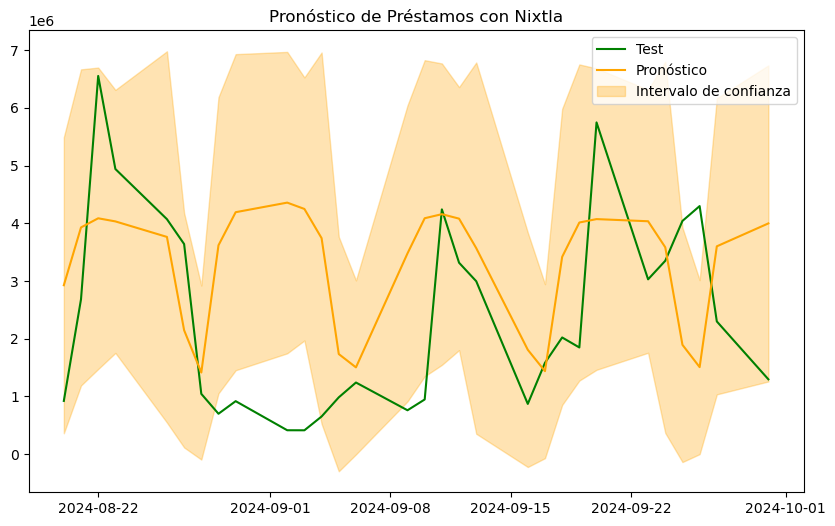

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plt.plot(train.index, train['CHU_COPA_AJUST'], label='Train', color='blue')
plt.plot(test.index, test['CHU_COPA_AJUST'], label='Test', color='green')
plt.plot(forecast_df["FECHITA"], forecast_df["TimeGPT"], label='Pronóstico', color='orange')
plt.fill_between(
    forecast_df["FECHITA"],
    forecast_df["TimeGPT-lo-80"],
    forecast_df["TimeGPT-hi-80"],
    color='orange',
    alpha=0.3,
    label='Intervalo de confianza'
)
plt.legend()
plt.title("Pronóstico de Préstamos con Nixtla")
plt.show()
